## Alex Masciotra 
## 260746829
## Assignment 1



### Part 1 : Filtering
    1.1 Denoising

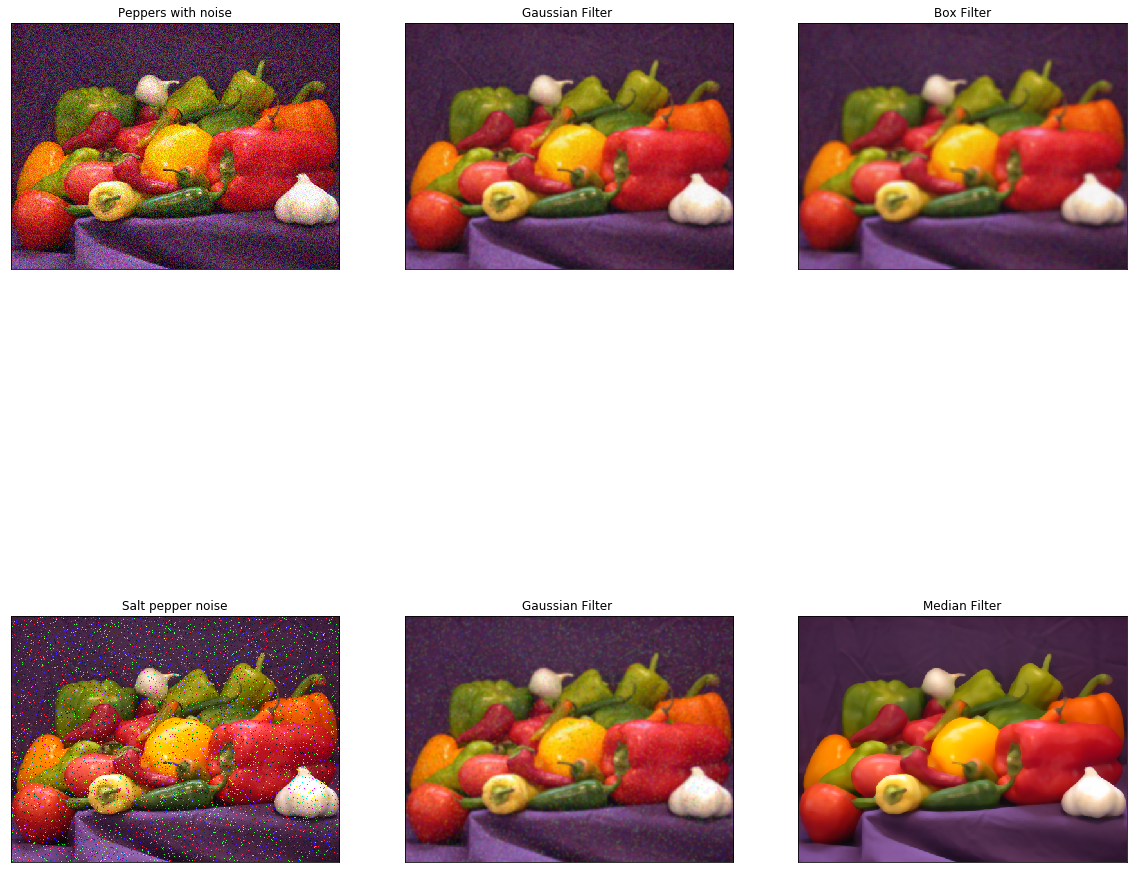

Clean vs Gaussian =  29.87927167099926
Clean vs Box = 28.278396476904042
Clean vs Gaussian Saltpepper =  28.1671611567447
Clean vs Median Saltpepper =  31.871009920638333


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import skimage
from skimage import data, io, filters

#loading the noisy pepppers image
image_pathnoisypeppers = "./gaussian_noise_peppers.png"
imgnoisypepper = cv2.imread(image_pathnoisypeppers)

#load the original clean image for reference
img_pathreg  = "./peppers.png"
imgregpepper = cv2.imread(img_pathreg)

#1.
#applying 7 by 7 gaussian filter with variance 2, STD = 1.41421356237 for sigmax and sigmay
blurGpepper = cv2.GaussianBlur(imgnoisypepper, (7,7), 1.41421356237)

#2
#applying box filter 7 by 7
blurBpepper = cv2.blur(imgnoisypepper, (7,7)) #using blur as per documentation, same as boxFilter, and matrix is same

#3 PSNR
signalnoiseG = skimage.measure.compare_psnr(imgregpepper, blurGpepper,None)
signalnoiseB = skimage.measure.compare_psnr(imgregpepper, blurBpepper, None)



#Loading Salt n Pepper noisy image


image_pathsaltpepperpeppers = "./saltandpepper_noise_peppers.png"
imgsaltpeppernoise = cv2.imread(image_pathsaltpepperpeppers)

#4 Applying Gaussian filter variance 2
blurGsaltpepper = cv2.GaussianBlur(imgsaltpeppernoise, (7,7), 1.41421356237)


#5 Median Filter
blurMsaltpepper = cv2.medianBlur(imgsaltpeppernoise, 7)

#6 PSNR
signalnoiseGsaltpepper = skimage.measure.compare_psnr(imgregpepper, blurGsaltpepper,None)
signalnoiseMsaltpepper = skimage.measure.compare_psnr(imgregpepper, blurMsaltpepper, None)






#plotting 



#convert all to RGB from BGR


imgnoisypepper = cv2.cvtColor(imgnoisypepper, cv2.COLOR_BGR2RGB)
blurGpepper    = cv2.cvtColor(blurGpepper, cv2.COLOR_BGR2RGB)
blurBpepper    = cv2.cvtColor(blurBpepper, cv2.COLOR_BGR2RGB)

imgsaltpeppernoise = cv2.cvtColor(imgsaltpeppernoise, cv2.COLOR_BGR2RGB)
blurGsaltpepper    = cv2.cvtColor(blurGsaltpepper, cv2.COLOR_BGR2RGB)
blurMsaltpepper    = cv2.cvtColor(blurMsaltpepper, cv2.COLOR_BGR2RGB)

#making 2 by 3 matrix for images to be displayed
plt.figure(figsize =(20,20))
plt.subplot(231), plt.imshow(imgnoisypepper)
plt.title("Peppers with noise"), plt.xticks([]), plt.yticks([])
plt.subplot(232), plt.imshow(blurGpepper)
plt.title("Gaussian Filter "), plt.xticks([]), plt.yticks([])
plt.subplot(233), plt.imshow(blurBpepper)
plt.title("Box Filter"), plt.xticks([]), plt.yticks([])
plt.subplot(234), plt.imshow(imgsaltpeppernoise)
plt.title("Salt pepper noise"), plt.xticks([]), plt.yticks([])
plt.subplot(235), plt.imshow(blurGsaltpepper)
plt.title("Gaussian Filter "), plt.xticks([]), plt.yticks([])
plt.subplot(236), plt.imshow(blurMsaltpepper)
plt.title("Median Filter"), plt.xticks([]), plt.yticks([])
plt.show()


print("Clean vs Gaussian = ", signalnoiseG)
print("Clean vs Box =", signalnoiseB)



print("Clean vs Gaussian Saltpepper = ", signalnoiseGsaltpepper)
print("Clean vs Median Saltpepper = ", signalnoiseMsaltpepper)


















Question 3 PSNR
The Gaussian filter seems to give the better result, this is because the PSNR is greater than the Box PSNR, which means the signal is stronger compared to the noise. This makes sense as the gaussian filter weighs the center of the pixel in the matrix more than the extremeties, while the box filter just measures the total average. 


Question 6 PSNR
Here the Median filter yields a higher PSNR, which is consistent with the theory behind the median vs the Gaussian Filter. This is because Salt and Pepper noise is a multiplicative noise, so linear filtering such as the Gaussian filter is not as productive as the Median filter. While the Gaussian filter is sufficient at filtering out additive noise it fails for multiplicative. A non-linear filtering method such as the Median filter should be used, and as seen represents a much higher PSNR ratio and nicer image. 
